**Fruit and Vegetable Image Recognition**

---



**Context**

[Kaggle dataset link](https://www.kaggle.com/kritikseth/fruit-and-vegetable-image-recognition)

This dataset contains images of the following food items:

- fruits- banana, apple, pear, grapes, orange, kiwi, watermelon, pomegranate, pineapple, mango.
- vegetables- cucumber, carrot, capsicum, onion, potato, lemon, tomato, raddish, beetroot, cabbage, lettuce, spinach, soy bean, cauliflower, bell pepper, chilli pepper, turnip, corn, sweetcorn, sweet potato, paprika, jalepeño, ginger, garlic, peas, eggplant.
Content

**This dataset contains three folders:**

  train (100 images each)

  test (10 images each)

  validation (10 images each)

  each of the above folders contains subfolders for different fruits and vegetables wherein the images for respective food items are present

**Data Collection**

The images in this dataset were scraped by me from Bing Image Search for a project of mine.

**Inspiration**

The idea was to build an application which recognizes the food item(s) from the captured photo and gives its user different recipes that can be made using the food item(s).



Download datasets

kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arpitchittora","key":"669d1691f1a806bd98f7e6a214b9cf5e"}'}

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

 99% 2.17G/2.19G [01:00<00:00, 21.6MB/s]
100% 2.19G/2.19G [01:00<00:00, 39.1MB/s]


Unzip datasets

In [5]:
import zipfile
with zipfile.ZipFile('./fruit-and-vegetable-image-recognition.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

Checking number of files

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os.path

In [7]:
import os
import shutil

In [8]:
train_path = './train'
test_path = './test'
validation_path = './validation'

In [9]:
train = os.listdir(train_path)

test = os.listdir(test_path)

validation = os.listdir(validation_path)

print(len(train),len(test),len(validation))

36 36 36


In [10]:
# Create a list with the filepaths for training and testing
train_dir = Path('./train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('./test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

val_dir = Path('./validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [11]:


def proc_img(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)
val_df = proc_img(val_filepaths)

In [12]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 3193

Number of different labels: 36

Labels: ['chilli pepper' 'carrot' 'sweetpotato' 'lettuce' 'spinach' 'garlic'
 'pomegranate' 'cauliflower' 'cabbage' 'bell pepper' 'lemon' 'pineapple'
 'sweetcorn' 'kiwi' 'tomato' 'beetroot' 'orange' 'capsicum' 'corn'
 'turnip' 'peas' 'paprika' 'apple' 'watermelon' 'raddish' 'potato'
 'jalepeno' 'cucumber' 'banana' 'onion' 'grapes' 'eggplant' 'pear'
 'ginger' 'soy beans' 'mango']


In [13]:
# The DataFrame with the filepaths in one column and the labels in the other one
train_df.head(5)

Filepath          Label
0  train/chilli pepper/Image_39.jpg  chilli pepper
1  train/chilli pepper/Image_55.jpg  chilli pepper
2         train/carrot/Image_70.jpg         carrot
3    train/sweetpotato/Image_19.jpg    sweetpotato
4        train/lettuce/Image_78.jpg        lettuce

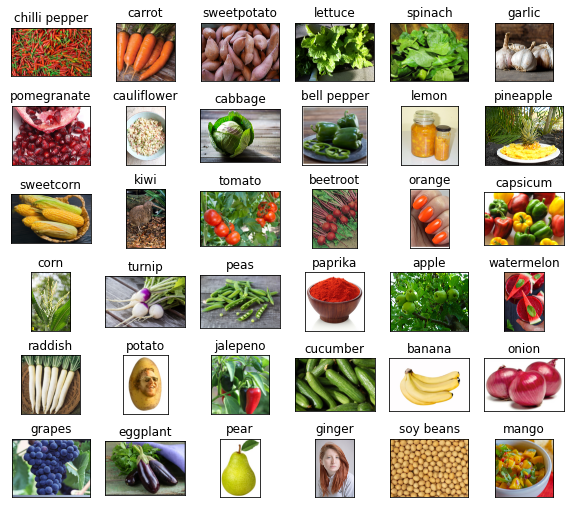

In [14]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [16]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
#     preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
# )

# test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
#     preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
# )

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 3193 validated image filenames belonging to 36 classes.
Found 334 validated image filenames belonging to 36 classes.
Found 334 validated image filenames belonging to 36 classes.


In [17]:
# Load the pretained model
pretrained_model = Xception(
    weights='imagenet',
    pooling='avg',
    include_top = False,
    input_shape=(224, 224, 3)
)
pretrained_model.trainable = False

83697664/83683744 [==============================] - 4s 0us/step


In [18]:
# Final model
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        ),
        checkpoint
    ]
)

Epoch 1/5
 21/100 [=====>........................] - ETA: 7:53 - loss: 3.1715 - accuracy: 0.2173

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 42/100 [===========>..................] - ETA: 5:47 - loss: 2.6293 - accuracy: 0.3356

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - ETA: 0s - loss: 1.8881 - accuracy: 0.4908

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


100/100 [==============================] - 668s 7s/step - loss: 1.8881 - accuracy: 0.4908 - val_loss: 0.6377 - val_accuracy: 0.7964
Epoch 2/5
100/100 [==============================] - 662s 7s/step - loss: 0.8548 - accuracy: 0.7372 - val_loss: 0.3341 - val_accuracy: 0.8892
Epoch 3/5
100/100 [==============================] - 666s 7s/step - loss: 0.5893 - accuracy: 0.8133 - val_loss: 0.2463 - val_accuracy: 0.9072
Epoch 4/5
100/100 [==============================] - 702s 7s/step - loss: 0.4263 - accuracy: 0.8609 - val_loss: 0.1878 - val_accuracy: 0.9431
Epoch 5/5
100/100 [==============================] - 700s 7s/step - loss: 0.3095 - accuracy: 0.8951 - val_loss: 0.1787 - val_accuracy: 0.9461


In [ ]:
# base_model = Xception(
#     weights='imagenet',
#     pooling='avg'
#     include_top = False,
#     input_shape=(224, 224, 3)
# )

# base_model.trainable = False

# inputs = keras.Input(shape=(224,224,3))

# base = base_model(inputs,training=False)

# pre_output = tf.keras.layers.Dense(128, activation='relu')(vectors)
# outputs = tf.keras.layers.Dense(36, activation='softmax')(pre_output)

# model = keras.Model(inputs,outputs)

In [ ]:
# learning_rate = 0.1

# optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# loss = keras.losses.CategoricalCrossentropy(from_logits=True)

# model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [ ]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
# history = model.fit(train_images, epochs=3, validation_data=val_images)

In [ ]:
# inputs = pretrained_model.input

# x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
# x = tf.keras.layers.Dense(128, activation='relu')(x)

# outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

# model = tf.keras.Model(inputs=inputs, outputs=outputs)

# model.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = model.fit(
#     train_images,
#     validation_data=val_images,
#     batch_size = 32,
#     epochs=5,
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=2,
#             restore_best_weights=True
#         )
#     ]
# )

Epoch 1/5
 34/100 [=========>....................] - ETA: 2:10 - loss: 3.0018 - accuracy: 0.2479

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 47/100 [=============>................] - ETA: 1:43 - loss: 2.6888 - accuracy: 0.3173

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 229s 2s/step - loss: 1.9364 - accuracy: 0.4867 - val_loss: 0.4708 - val_accuracy: 0.8593
Epoch 2/5
100/100 [==============================] - 218s 2s/step - loss: 0.7295 - accuracy: 0.7789 - val_loss: 0.2747 - val_accuracy: 0.9132
Epoch 3/5
100/100 [==============================] - 222s 2s/step - loss: 0.4469 - accuracy: 0.8616 - val_loss: 0.1666 - val_accuracy: 0.9461
Epoch 4/5
100/100 [==============================] - 222s 2s/step - loss: 0.2702 - accuracy: 0.9205 - val_loss: 0.1187 - val_accuracy: 0.9760
Epoch 5/5
100/100 [==============================] - 222s 2s/step - loss: 0.1828 - accuracy: 0.9474 - val_loss: 0.1107 - val_accuracy: 0.9671


In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


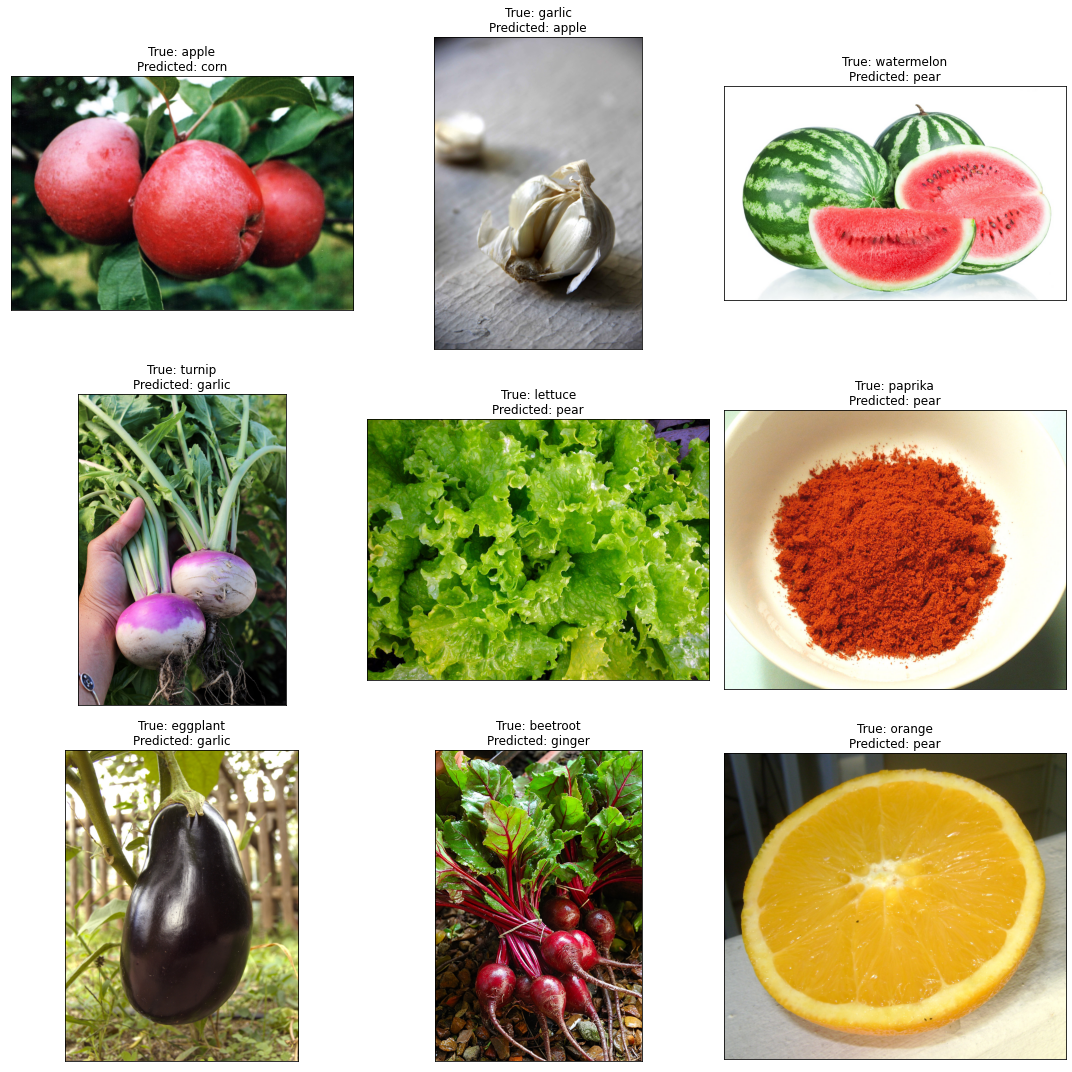

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [59]:
test_df.head(2)

Filepath     Label
0     test/garlic/Image_8.jpg    garlic
1  test/beetroot/Image_10.jpg  beetroot

In [19]:
model = keras.models.load_model('xception_v1_05_0.946.h5')

In [21]:
from tensorflow.keras.preprocessing.image import load_img

In [49]:
path = './test/grapes/Image_1.jpg'

In [50]:
img = load_img(path, target_size=(224, 224))

In [51]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 224, 224, 3)

In [52]:
X = preprocess_input(X)

In [53]:
pred = model.predict(X)
pred

array([[8.4229243e-05, 8.2267998e-06, 1.6454251e-03, 8.3480006e-07,
        6.6031200e-05, 2.9902472e-04, 3.1961570e-06, 4.7349795e-06,
        7.4795251e-05, 2.2766364e-05, 9.5192530e-07, 3.3096949e-04,
        3.6810616e-05, 1.0421392e-05, 9.8232919e-01, 2.3445404e-05,
        3.8442645e-06, 6.3190860e-06, 5.4856996e-06, 6.5804947e-05,
        3.1539539e-03, 1.6729227e-04, 5.9014692e-05, 4.1679683e-04,
        2.9245709e-04, 4.3967194e-08, 3.6862417e-04, 1.0721085e-05,
        8.7206177e-03, 1.7644586e-05, 2.8176964e-05, 1.1028819e-05,
        2.2544116e-06, 6.9972091e-05, 1.6587337e-03, 2.2367620e-07]],
      dtype=float32)

In [54]:
class_names = ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [58]:
result= dict(zip(class_names, pred[0]))
max(zip(result.values(), result.keys()))[1]

'grapes'

In [ ]:
data = [{'Filepath':'./train/apple/Image_1.jpg','Label':'apple'}]
request_img = pd.DataFrame(data)
request_img

Filepath  Label
0  ./train/apple/Image_1.jpg  apple

In [ ]:
singleTestImg = test_generator.flow_from_dataframe(
    dataframe=request_img,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1 validated image filenames belonging to 1 classes.


In [ ]:
# Predict the label of the test_images
pred = model.predict(singleTestImg)
pred

array([[9.98315573e-01, 8.21901214e-10, 9.05215671e-08, 2.55048271e-09,
        1.94608685e-09, 1.37630272e-08, 3.73776565e-10, 1.19290275e-08,
        1.31235334e-08, 4.16564533e-10, 1.38707812e-09, 2.34971331e-09,
        2.53277607e-11, 1.25947599e-08, 6.54925074e-08, 4.73346029e-09,
        2.96817416e-06, 2.37191351e-08, 2.54457522e-08, 1.83364307e-07,
        9.37590339e-10, 2.89966380e-07, 4.03022149e-09, 1.62685663e-03,
        1.40174525e-10, 2.36101649e-09, 4.34886133e-05, 9.13474923e-06,
        4.14955394e-07, 2.90542945e-09, 2.22429691e-07, 1.33859077e-10,
        8.25599002e-08, 2.35144853e-07, 1.43111961e-07, 1.51921142e-07]],
      dtype=float32)

In [ ]:
class_names = ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']

len(class_names)

36

In [ ]:
pred[0]

array([9.98315573e-01, 8.21901214e-10, 9.05215671e-08, 2.55048271e-09,
       1.94608685e-09, 1.37630272e-08, 3.73776565e-10, 1.19290275e-08,
       1.31235334e-08, 4.16564533e-10, 1.38707812e-09, 2.34971331e-09,
       2.53277607e-11, 1.25947599e-08, 6.54925074e-08, 4.73346029e-09,
       2.96817416e-06, 2.37191351e-08, 2.54457522e-08, 1.83364307e-07,
       9.37590339e-10, 2.89966380e-07, 4.03022149e-09, 1.62685663e-03,
       1.40174525e-10, 2.36101649e-09, 4.34886133e-05, 9.13474923e-06,
       4.14955394e-07, 2.90542945e-09, 2.22429691e-07, 1.33859077e-10,
       8.25599002e-08, 2.35144853e-07, 1.43111961e-07, 1.51921142e-07],
      dtype=float32)

In [ ]:
result= dict(zip(class_names, pred[0]))

In [ ]:
max(zip(result.values(), result.keys()))[1]

'apple'

In [ ]:
f"True: {request_img.Label.iloc[i]}\nPredicted: {pred[i]}"

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
class_names = train_df.Label.unique()
class_names

array(['pomegranate', 'onion', 'bell pepper', 'tomato', 'mango',
       'capsicum', 'turnip', 'spinach', 'orange', 'peas', 'ginger',
       'sweetcorn', 'lemon', 'sweetpotato', 'corn', 'raddish', 'jalepeno',
       'soy beans', 'cucumber', 'grapes', 'garlic', 'potato', 'banana',
       'pear', 'lettuce', 'watermelon', 'beetroot', 'paprika',
       'pineapple', 'cabbage', 'kiwi', 'cauliflower', 'chilli pepper',
       'apple', 'carrot', 'eggplant'], dtype=object)

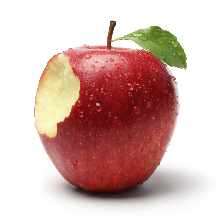

In [ ]:
path = './train/apple'
name = 'Image_1.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname,target_size=(224,224))
img

In [ ]:
x = np.array(img)
X = np.array([x])
X.shape
X = preprocess_input(X)
pred = model.predict(X)

In [ ]:
dict(zip(class_names, pred[0]))

{'apple': 1.716647e-06,
 'banana': 5.572138e-09,
 'beetroot': 1.086781e-07,
 'bell pepper': 0.012026377,
 'cabbage': 6.559863e-07,
 'capsicum': 6.020889e-08,
 'carrot': 8.635018e-06,
 'cauliflower': 7.879271e-09,
 'chilli pepper': 1.6713744e-06,
 'corn': 1.7252716e-10,
 'cucumber': 0.98758495,
 'eggplant': 4.2955037e-07,
 'garlic': 9.1681244e-08,
 'ginger': 2.5065116e-08,
 'grapes': 3.827606e-06,
 'jalepeno': 3.9415988e-07,
 'kiwi': 1.9634765e-09,
 'lemon': 1.1251827e-05,
 'lettuce': 1.6247364e-07,
 'mango': 2.4812933e-05,
 'onion': 1.0926131e-07,
 'orange': 3.766425e-08,
 'paprika': 3.8114479e-06,
 'pear': 2.9991856e-05,
 'peas': 7.9053625e-06,
 'pineapple': 5.433001e-08,
 'pomegranate': 2.7538308e-08,
 'potato': 1.60744e-06,
 'raddish': 2.039086e-06,
 'soy beans': 0.00024976855,
 'spinach': 1.5779406e-10,
 'sweetcorn': 2.6008627e-06,
 'sweetpotato': 3.6619273e-05,
 'tomato': 2.1363478e-09,
 'turnip': 8.894699e-08,
 'watermelon': 5.258147e-08}

In [ ]:
testres = {'apple': 1.716647e-06,
 'banana': 5.572138e-09,
 'beetroot': 1.086781e-07,
 'bell pepper': 0.012026377,
 'cabbage': 6.559863e-07,
 'capsicum': 6.020889e-08,
 'carrot': 8.635018e-06,
 'cauliflower': 7.879271e-09,
 'chilli pepper': 1.6713744e-06,
 'corn': 1.7252716e-10,
 'cucumber': 0.98758495,
 'eggplant': 4.2955037e-07,
 'garlic': 9.1681244e-08,
 'ginger': 2.5065116e-08,
 'grapes': 3.827606e-06,
 'jalepeno': 3.9415988e-07,
 'kiwi': 1.9634765e-09,
 'lemon': 1.1251827e-05,
 'lettuce': 1.6247364e-07,
 'mango': 2.4812933e-05,
 'onion': 1.0926131e-07,
 'orange': 3.766425e-08,
 'paprika': 3.8114479e-06,
 'pear': 2.9991856e-05,
 'peas': 7.9053625e-06,
 'pineapple': 5.433001e-08,
 'pomegranate': 2.7538308e-08,
 'potato': 1.60744e-06,
 'raddish': 2.039086e-06,
 'soy beans': 0.00024976855,
 'spinach': 1.5779406e-10,
 'sweetcorn': 2.6008627e-06,
 'sweetpotato': 3.6619273e-05,
 'tomato': 2.1363478e-09,
 'turnip': 8.894699e-08,
 'watermelon': 5.258147e-08}
max(zip(testres.values(), testres.keys()))[1]

'cucumber'

===================================

Load an image

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

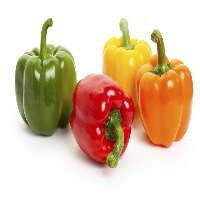

In [ ]:
path = './train/bell pepper'
name = 'Image_1.jpg'
fullname = f'{path}/{name}'
single_img = load_img(fullname,target_size=(200,200))
single_img

In [ ]:
x = np.array(single_img)
x.shape


(200, 200, 3)

Convert image to RGBA format

In [ ]:
from PIL import Image

In [ ]:
# convert images to RGBA for train folder
for folder in os.listdir(train_path):
  for image in os.listdir(f'{train_path}/{folder}'):
    full_name = f'{train_path}/{folder}/{image}'
    if not os.path.isdir(full_name) and os.path.exists(full_name):
      im = Image.open(full_name)
      # If is png image
      if im.format is 'PNG':
        # and is not RGBA
        if im.mode is not 'RGBA':
          text = image.split(".")
          filename = text[0]
          extension = text[1]
          deleteFile = False

          if extension.lower() == 'jpg' or extension == 'jpeg':
            extension = 'png'
            deleteFile = True

          save_path = f'{train_path}/{folder}/{filename}.{extension}'
          print(save_path)
          im.convert("RGBA").save(save_path)
          if deleteFile and os.path.exists(full_name):
            os.remove(full_name)

./train/carrot/Image_97.png
./train/carrot/Image_4.png
./train/carrot/Image_68.png
./train/lemon/Image_45.png
./train/lemon/Image_39.png
./train/peas/Image_97.png
./train/peas/Image_5.png
./train/peas/Image_30.png
./train/turnip/Image_51.png
./train/turnip/Image_69.png
./train/turnip/Image_66.png
./train/spinach/Image_63.png
./train/spinach/Image_67.png
./train/soy beans/Image_32.png
./train/soy beans/Image_13.png
./train/soy beans/Image_34.png
./train/paprika/Image_26.png
./train/paprika/Image_22.png
./train/orange/Image_69.PNG
./train/orange/Image_42.png


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


./train/ginger/Image_42.png
./train/cabbage/Image_63.png
./train/lettuce/Image_74.png
./train/lettuce/Image_70.png
./train/sweetcorn/Image_55.png
./train/capsicum/Image_49.png
./train/capsicum/Image_95.png
./train/capsicum/Image_52.png
./train/pear/Image_82.png
./train/pear/Image_86.png
./train/onion/Image_37.png
./train/onion/Image_78.png
./train/chilli pepper/Image_19.png
./train/apple/Image_83.png
./train/apple/Image_65.png
./train/apple/Image_66.png
./train/apple/Image_12.png
./train/tomato/Image_31.png
./train/tomato/Image_42.png
./train/beetroot/Image_84.png
./train/beetroot/Image_18.png
./train/raddish/Image_88.png
./train/raddish/Image_9.png
./train/raddish/Image_38.png
./train/raddish/Image_87.png
./train/cauliflower/Image_33.png
./train/cucumber/Image_55.png
./train/cucumber/Image_82.png
./train/cucumber/Image_42.png
./train/mango/Image_90.png
./train/mango/Image_51.png
./train/grapes/Image_7.png
./train/grapes/Image_45.png
./train/grapes/Image_39.png
./train/bell pepper/Imag

In [ ]:
# convert images to RGBA for validation folder
for folder in os.listdir(validation_path):
  for image in os.listdir(f'{validation_path}/{folder}'):
    full_name = f'{validation_path}/{folder}/{image}'
    if not os.path.isdir(full_name) and os.path.exists(full_name):
      im = Image.open(full_name)
      # If is png image
      if im.format is 'PNG':
        # and is not RGBA
        if im.mode is not 'RGBA':
          text = image.split(".")
          filename = text[0]
          extension = text[1]
          deleteFile = False

          if extension.lower() == 'jpg' or extension == 'jpeg':
            extension = 'png'
            deleteFile = True

          save_path = f'{validation_path}/{folder}/{filename}.{extension}'
          print(save_path)
          im.convert("RGBA").save(save_path)
          if deleteFile and os.path.exists(full_name):
            os.remove(full_name)

./validation/carrot/Image_4.png
./validation/peas/Image_6.png
./validation/raddish/Image_5.png


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
batch_size = 36
img_height = 199
img_width = 199

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3581 files belonging to 36 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


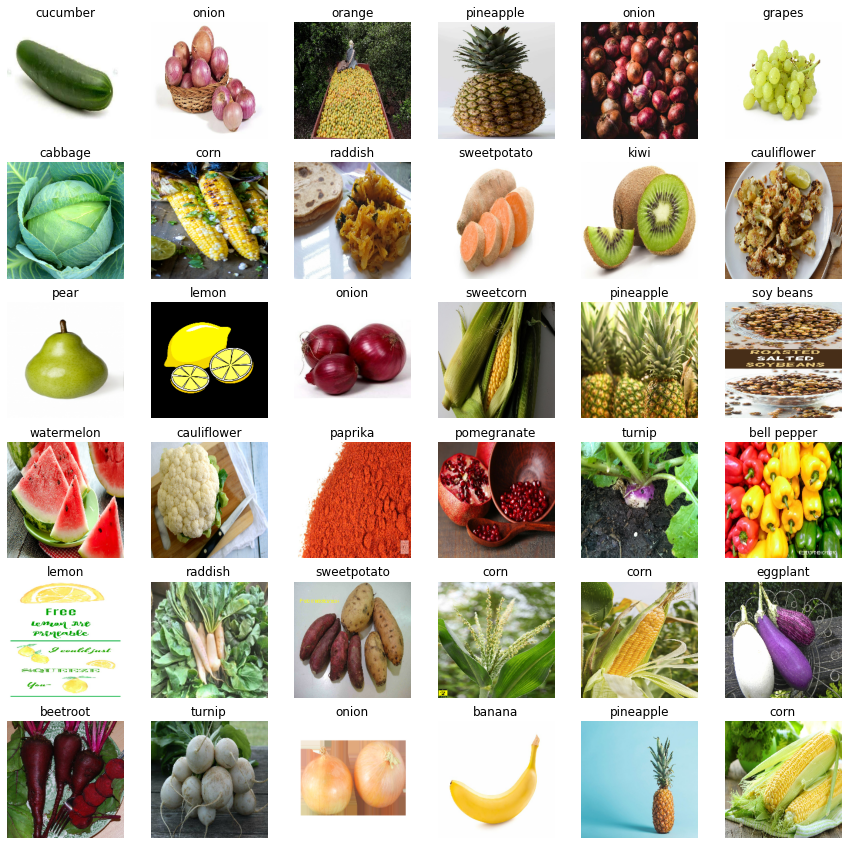

In [ ]:
# Showing random file from traning dataset
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(len(class_names)):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


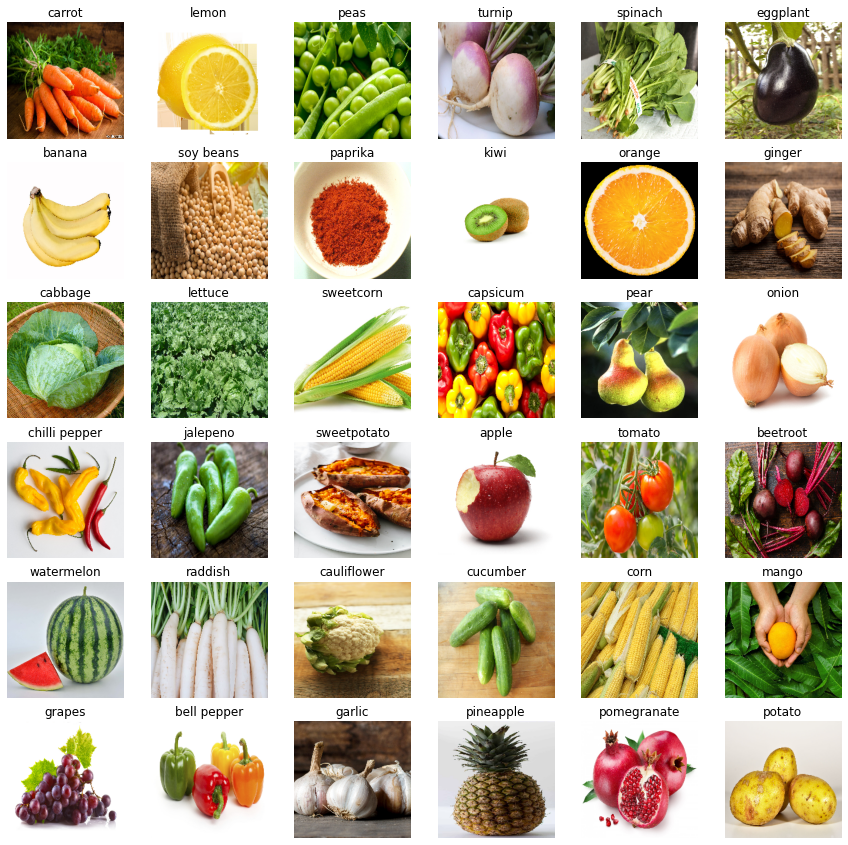

In [ ]:
# Showing all file from each folder or each class
plt.figure(figsize=(15, 15))
folders = os.listdir("./train")
for i in range(len(folders)):
  fname = folders[i]
  path = f'./train/{fname}'
  name = 'Image_1.jpg'
  fullname = f'{path}/{name}'
  if not os.path.exists(fullname):
    name = 'Image_1.jpeg'
    fullname = f'{path}/{name}'
  if not os.path.exists(fullname):
    name = 'Image_1.png'
    fullname = f'{path}/{name}'
  ax = plt.subplot(6, 6, i + 1)
  img = load_img(fullname, target_size=(img_height, img_width))
  x = np.array(img)
  X = np.array([x])
  plt.imshow(x.astype("uint8"))
  plt.title(fname)
  plt.axis("off")


In [ ]:
# delete file if size is zero
# convert images to RGBA for validation folder
for folder in os.listdir(validation_path):
  for image in os.listdir(f'{validation_path}/{folder}'):
    full_name = f'{validation_path}/{folder}/{image}'
    if not os.path.isdir(full_name) and os.path.exists(full_name) and os.stat(full_name).st_size <= 5:
      print(full_name,os.stat(fullname).st_size)
      # os.remove(full_name)


**Pre-trained convolutional neural networks**

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [ ]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91897856/91884032 [==============================] - 1s 0us/step


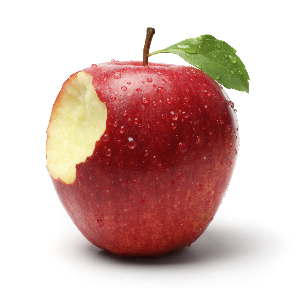

In [ ]:
path = './train/apple'
name = 'Image_1.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname,target_size=(299,299))
img

In [ ]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [ ]:
X = preprocess_input(X)

In [ ]:
pred = model.predict(X)

In [ ]:
decode_predictions(pred)

49152/35363 [=========================================] - 0s 0us/step


[[('n07742313', 'Granny_Smith', 0.950798),
  ('n07768694', 'pomegranate', 0.009958339),
  ('n07747607', 'orange', 0.004765431),
  ('n07753113', 'fig', 0.0031319815),
  ('n07749582', 'lemon', 0.002782939)]]

**Tranfser learning**

Reading data with ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './train',
    target_size=(224,224),
    batch_size=32,
    shuffle=True,
    color_mode='rgb',
    class_mode='categorical',
    seed=0,
    interpolation="nearest"
)

Found 3581 images belonging to 36 classes.


In [ ]:
train_ds.class_indices

{'apple': 0,
 'banana': 1,
 'beetroot': 2,
 'bell pepper': 3,
 'cabbage': 4,
 'capsicum': 5,
 'carrot': 6,
 'cauliflower': 7,
 'chilli pepper': 8,
 'corn': 9,
 'cucumber': 10,
 'eggplant': 11,
 'garlic': 12,
 'ginger': 13,
 'grapes': 14,
 'jalepeno': 15,
 'kiwi': 16,
 'lemon': 17,
 'lettuce': 18,
 'mango': 19,
 'onion': 20,
 'orange': 21,
 'paprika': 22,
 'pear': 23,
 'peas': 24,
 'pineapple': 25,
 'pomegranate': 26,
 'potato': 27,
 'raddish': 28,
 'soy beans': 29,
 'spinach': 30,
 'sweetcorn': 31,
 'sweetpotato': 32,
 'tomato': 33,
 'turnip': 34,
 'watermelon': 35}

In [ ]:
X, y = next(train_ds)

In [ ]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.]], dtype=float32)

In [ ]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './validation',
    target_size=(224,224),
    batch_size=32,
    shuffle=True,
    seed=0,
    color_mode='rgb',
    class_mode='categorical',
    interpolation="nearest"
)

Found 351 images belonging to 36 classes.


Create a base model

In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top = False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

inputs = keras.Input(shape=(224,224,3))

base = base_model(inputs,training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)
pre_output = tf.keras.layers.Dense(128, activation='relu')(vectors)
pre_output = tf.keras.layers.Dense(128, activation='relu')(pre_output)
outputs = tf.keras.layers.Dense(36, activation='softmax')(pre_output)

model = keras.Model(inputs,outputs)

Add optimizer and loss

In [ ]:
learning_rate = 0.01

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


 42/112 [==========>...................] - ETA: 8:13 - loss: 2.4635 - accuracy: 0.3616

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


112/112 [==============================] - 870s 8s/step - loss: 1.8461 - accuracy: 0.4923 - val_loss: 0.6994 - val_accuracy: 0.7407
Epoch 2/5
112/112 [==============================] - 865s 8s/step - loss: 1.0207 - accuracy: 0.6766 - val_loss: 0.4722 - val_accuracy: 0.8405
Epoch 3/5
112/112 [==============================] - 857s 8s/step - loss: 0.8061 - accuracy: 0.7330 - val_loss: 0.3974 - val_accuracy: 0.8376
Epoch 4/5
112/112 [==============================] - ETA: 0s - loss: 0.7701 - accuracy: 0.7506

KeyboardInterrupt: ignored

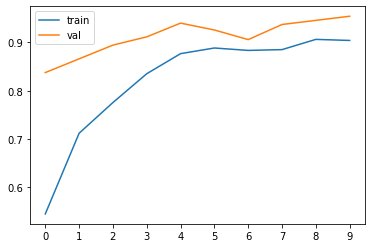

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()


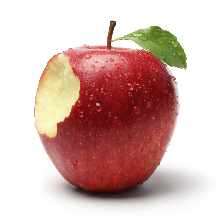

In [ ]:
path = './train/apple'
name = 'Image_1.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname,target_size=(224,224))
img

In [ ]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 224, 224, 3)

In [ ]:
pred = model.predict(X)

In [ ]:
dict(zip(class_names, pred[0]))

{'apple': 0.0,
 'banana': 0.0,
 'beetroot': 0.0,
 'bell pepper': 0.0,
 'cabbage': 0.0,
 'capsicum': 0.0,
 'carrot': 0.17544094,
 'cauliflower': 0.0,
 'chilli pepper': 0.0,
 'corn': 0.0,
 'cucumber': 0.0,
 'eggplant': 0.0,
 'garlic': 0.0,
 'ginger': 0.0,
 'grapes': 0.0,
 'jalepeno': 0.0,
 'kiwi': 0.0,
 'lemon': 0.0,
 'lettuce': 0.0,
 'mango': 1.1990168e-38,
 'onion': 0.0,
 'orange': 0.0,
 'paprika': 0.0,
 'pear': 0.0,
 'peas': 0.0,
 'pineapple': 0.0,
 'pomegranate': 0.0,
 'potato': 0.0,
 'raddish': 0.8245591,
 'soy beans': 0.0,
 'spinach': 0.0,
 'sweetcorn': 0.0,
 'sweetpotato': 9.880887e-38,
 'tomato': 0.0,
 'turnip': 0.0,
 'watermelon': 0.0}

In [ ]:
inputs = keras.Input(shape=(199, 199, 3))

conv = keras.layers.Conv2D(filters=64, kernel_size=(3,3), 
                           activation="relu")(inputs)

max_pool_2d = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)

vectors = keras.layers.Flatten()(max_pool_2d)

dense = keras.layers.Dense(64, activation='relu')(vectors)

outputs = keras.layers.Dense(1, activation='softmax')(dense)

CNNmodel = keras.Model(inputs, outputs)

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.8)

In [ ]:
CNNmodel.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 199, 199, 3)]     0         
                                                                 
 conv2d_11 (Conv2D)          (None, 197, 197, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 98, 98, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 614656)            0         
                                                                 
 dense_7 (Dense)             (None, 64)                39338048  
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                           

In [ ]:
loss = keras.losses.BinaryCrossentropy()

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_ds = image_gen.flow_from_directory(
    './train',
    class_mode='binary',
    target_size=(199, 199),
    batch_size=20
)

val_ds = image_gen.flow_from_directory(
    './validation',
    class_mode='binary',
    target_size=(199, 199),
    batch_size=20
)

Found 3581 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [ ]:
val_ds.class_indices

{'apple': 0,
 'banana': 1,
 'beetroot': 2,
 'bell pepper': 3,
 'cabbage': 4,
 'capsicum': 5,
 'carrot': 6,
 'cauliflower': 7,
 'chilli pepper': 8,
 'corn': 9,
 'cucumber': 10,
 'eggplant': 11,
 'garlic': 12,
 'ginger': 13,
 'grapes': 14,
 'jalepeno': 15,
 'kiwi': 16,
 'lemon': 17,
 'lettuce': 18,
 'mango': 19,
 'onion': 20,
 'orange': 21,
 'paprika': 22,
 'pear': 23,
 'peas': 24,
 'pineapple': 25,
 'pomegranate': 26,
 'potato': 27,
 'raddish': 28,
 'soy beans': 29,
 'spinach': 30,
 'sweetcorn': 31,
 'sweetpotato': 32,
 'tomato': 33,
 'turnip': 34,
 'watermelon': 35}

In [ ]:
CNNmodel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
# Train the CNN
history = CNNmodel.fit(
    train_ds,
    steps_per_epoch=150,
    epochs=10,
    validation_data=val_ds,
    validation_steps=49
)

Epoch 1/10
  9/150 [>.............................] - ETA: 3:29 - loss: nan - accuracy: 0.0333

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


150/150 [==============================] - 211s 1s/step - loss: nan - accuracy: 0.0292
Epoch 2/10
150/150 [==============================] - 209s 1s/step - loss: nan - accuracy: 0.0272
Epoch 3/10
150/150 [==============================] - 217s 1s/step - loss: nan - accuracy: 0.0312
Epoch 4/10
150/150 [==============================] - 212s 1s/step - loss: nan - accuracy: 0.0292
Epoch 5/10
150/150 [==============================] - 213s 1s/step - loss: nan - accuracy: 0.0275
Epoch 6/10
150/150 [==============================] - 214s 1s/step - loss: nan - accuracy: 0.0278
Epoch 7/10
119/150 [======================>.......] - ETA: 43s - loss: nan - accuracy: 0.0288

KeyboardInterrupt: ignored

Above code is working as we expected. Now we will move in keras mobilenet .